# K-means Clustering and Principal Component
In this exercise, we implement the K-means clustering algorithm and
apply it to compress an image. In the second part, we use principal
component analysis to find a low-dimensional representation of face images.

## K-means Clustering
In this exercise, we implement the K-means algorithm and use it
for image compression. We first start on an example 2D dataset that 
will help us gain an intuition of how the K-means algorithm works. After
that, we use the K-means algorithm for image compression by reducing
the number of colors that occur in an image to only those that are most
common in that image.

The K-means algorithm is a method to automatically cluster similar data examples together. Concretely, you are given a training set {x(1) , ..., x(m) } (where x(i) ∈ Rⁿ), and want to group the data into a few cohesive “clusters”.

The intuition behind K-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments.

The K-means algorithm is as follows:

```
% Initialize centroids
centroids = kMeansInitCentroids(X, K);
for iter = 1:iterations
    % Cluster assignment step: Assign each data point to the
    % closest centroid. idx(i) corresponds to cˆ(i), the index
    % of the centroid assigned to example i
    idx = findClosestCentroids(X, centroids);
    % Move centroid step: Compute means based on centroid
    % assignments
    centroids = computeMeans(X, idx, K);
end
```

The inner-loop of the algorithm repeatedly carries out two steps: 
- (i) Assigning each training example x(i) to its closest centroid, and 
- (ii) Recomputing the mean of each centroid using the points assigned to it. 

The K-means algorithm will always converge to some final set of means for the centroids.
Note that the converged solution may not always be ideal and depends on the
initial setting of the centroids. Therefore, in practice the K-means algorithm
is usually run a few times with different random initializations. One way to
choose between these different solutions from different random initializations
is to choose the one with the lowest cost function value (distortion).

We implement the two phases of the K-means algorithm separately
in the next sections.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
plt.style.use('ggplot')

In [66]:
data1 = scipy.io.loadmat('./data/ex7data1.mat')
X1 = data1['X']
data2 = scipy.io.loadmat('./data/ex7data2.mat')
X2 = data2['X']

X1.shape, X2.shape

((50, 2), (300, 2))

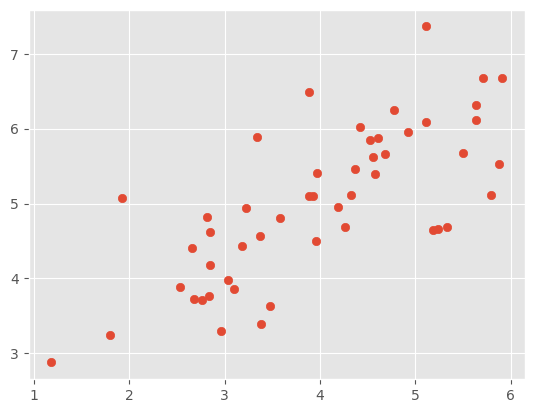

In [64]:
plt.scatter(X1[:, 0], X1[:, 1])

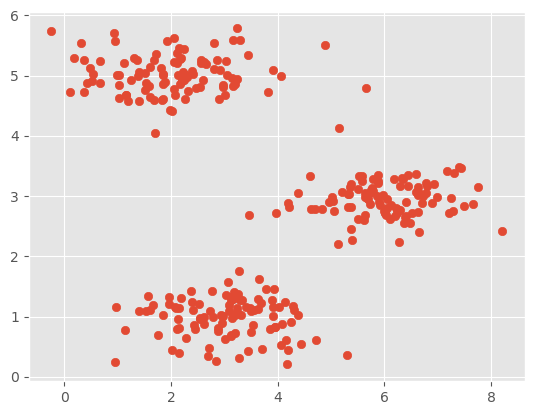

In [65]:
plt.scatter(X2[:, 0], X2[:, 1])

### Finding closest centroids

In the “cluster assignment” phase of the K-means algorithm, the algorithm assigns every training example $x^{(i)}$ to its closest centroid, given the current positions of centroids. Specifically, for every example $i$ we set

$$c^{(i)} := j \quad \text{that minimizes} \quad \lvert\rvert x^{(i)} - \mu_j  \lvert\rvert^2, $$

where $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$, and $\mu_j$ is the position (value) of the $j^{th}$ centroid. Note that $c^{(i)}$ corresponds to `idx[i]` in the starter code.

The code in the function `findClosestCentroids` takes the data matrix `X` and the locations of all centroids inside `centroids` and should output a one-dimensional array `idx` that holds the index (a value in $\{1, ..., K\}$, where $K$ is total number of centroids) of the closest centroid to every training example.

We implement this using a loop over every training example and every centroid.

In [68]:
def findClosestCentroids(X, centroids):
    centroids = np.array(centroids)
    # (i) Assigning each training example x(i) to its closest centroid, and
    for t in range(100):
        closest = []
        for x in X:
            distances = []
            for c in centroids:
                # computes the Euclidean distance directly by finding the norm of the difference between the two vectors
                d = np.linalg.norm(x - c)
                distances.append(d)
            closest.append(np.argmin(np.array(distances)))
        # (ii) Recomputing the mean of each centroid using the points assigned to it.
        new_centroids = []
        for k in range(len(centroids)):
            closest = np.array(closest)
            ids = (closest == k)
            group = X[ids]
            new_centroids.append(np.mean(group, axis=0))
    return new_centroids, closest    
        

In [73]:
def findClosestCentroids(X, centroids):
    centroids = np.array(centroids)
    # (i) Assigning each training example x(i) to its closest centroid, and
    closest = []
    for x in X:
        distances = []
        for c in centroids:
            # computes the Euclidean distance directly by finding the norm of the difference between the two vectors
            d = np.linalg.norm(x - c)
            distances.append(d)
        closest.append(np.argmin(np.array(distances)))
    return closest


In [94]:
# Select an initial set of centroids
K = 3   # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the initial_centroids
idx = findClosestCentroids(X2, initial_centroids)

print('Closest centroids for the first 3 examples:')
print(idx[:3])
print('(the closest centroids should be 0, 2, 1 respectively)')

Closest centroids for the first 3 examples:
[0, 2, 1]
(the closest centroids should be 0, 2, 1 respectively)


### Computing Centroid Means

Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. Specifically, for every centroid $ k $ we set:

$$
\mu_k := \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}
$$

where \( C_k \) is the set of examples that are assigned to centroid $ k $. Concretely, if two examples $ x^{(3)} $ and $ x^{(5)} $ are assigned to centroid $ k = 2 $, then you should update:

$$
\mu_2 = \frac{1}{2}(x^{(3)} + x^{(5)})
$$

You should now complete the code in `computeCentroids`. You can implement this function using a loop over the centroids. You can also use a loop over the examples; but if you can use a vectorized implementation that does not use such a loop, your code may run faster.

In [131]:
def computeCentroids(X, idx, K):
    idx = np.array(idx)
    new_centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        ids = (idx == k)
        group = X[ids]
        new_centroids[k, :] = (np.mean(group, axis=0))
    return new_centroids

In [132]:
# Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X2, idx, K)

print('Centroids computed after initial finding of closest centroids:')
print(centroids)
print('\nThe centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')

Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

The centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


### K-means on example dataset

After you have completed the two functions (findClosestCentroids and
computeCentroids), the next step in ex7.m will run the K-means algorithm
on a toy 2D dataset to help you understand how K-means works. Your
functions are called from inside the runKmeans.m script. We encourage you
to take a look at the function to understand how it works. Notice that the
code calls the two functions you implemented in a loop.
When you run the next step, the K-means code will produce a visualization that steps you through the progress of the algorithm at each iteration.
Press enter multiple times to see how each step of the K-means algorithm
changes the centroids and cluster assignments. At the end, your figure should
look as the one displayed in Figure

In [137]:
def kmeans(X, initial_centroids, turns=5):
    centroids = [initial_centroids]
    for i in range(turns):
        closet = findClosestCentroids(X, centroids[-1])
        new_centroids = computeCentroids(X, closet, len(initial_centroids))
        centroids.append(new_centroids)
    return np.array(centroids)
        
    

In [140]:
centroids2 =  kmeans(X2, initial_centroids)

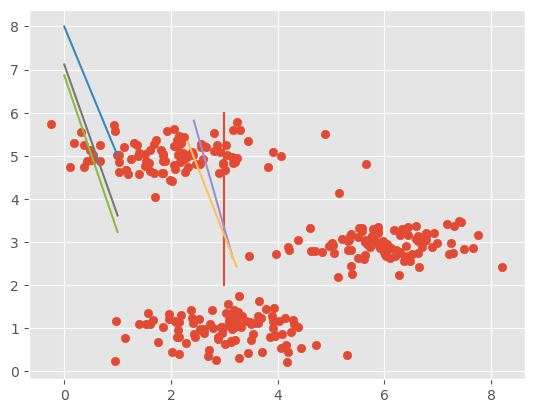

In [160]:
plt.plot(*centroids2[0])
plt.plot(*centroids2[1])
plt.plot(*centroids2[2])

plt.scatter(X2[:, 0], X2[:, 1])

In [147]:
centroids2[0].T

array([[3., 6., 8.],
       [3., 2., 5.]])